In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from dataset import create_dataset

In [2]:
data = create_dataset(train=False, batch_size=1)

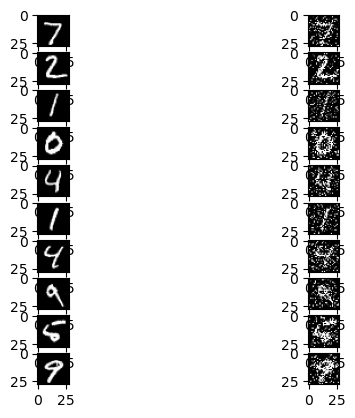

In [3]:
fig, axs = plt.subplots(nrows=10, ncols=2)
for i, (imgs, label) in enumerate(data):
    if i == 10:
        break
    imgs = imgs.squeeze()
    axs[i][0].imshow(imgs, cmap="gray")

    imgs2 = np.load(f"results/{i}.npy")
    axs[i][1].imshow(imgs2.reshape(28,28), cmap="gray")
    

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("results/results.csv", header=None)
df.columns = ["real_err", "computed_err", "worst_err"]
df

,real_err,computed_err,worst_err
0,0.013664,0.013664,0.049705
1,0.014901,0.014901,0.037041
2,0.007749,0.007749,0.032232
3,0.008000,0.008000,0.024220
4,0.004165,0.004165,0.019989
...,...,...,...
9995,0.009116,0.009116,0.034179
9996,0.010754,0.010754,0.067022
9997,0.009416,0.009416,0.039475
9998,0.007616,0.007616,0.023808


In [6]:
df_sel = df[["real_err", "worst_err"]].melt()
df_sel

,variable,value
0,real_err,0.013664
1,real_err,0.014901
2,real_err,0.007749
3,real_err,0.008000
4,real_err,0.004165
...,...,...
19995,worst_err,0.034179
19996,worst_err,0.067022
19997,worst_err,0.039475
19998,worst_err,0.023808


<Axes: xlabel='value', ylabel='Count'>

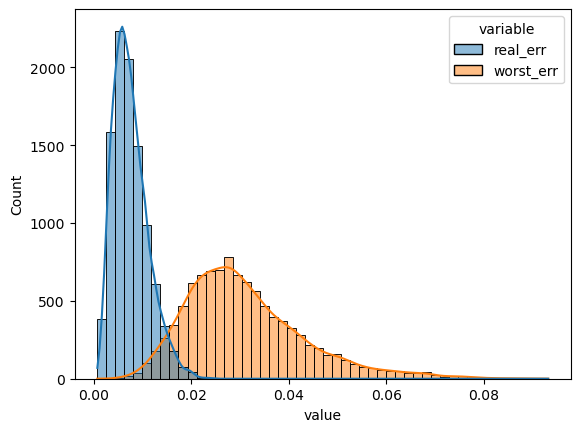

In [7]:
sns.histplot(data=df_sel, x="value", hue="variable", bins=50, kde=True)

<Axes: xlabel='value'>

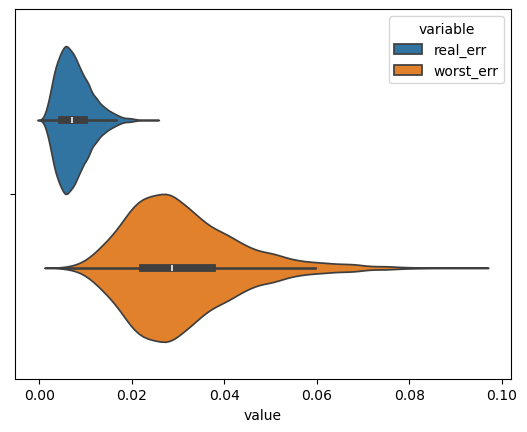

In [8]:
sns.violinplot(data=df_sel, x="value", hue="variable")

In [9]:
df["image"] = df.index
df

,real_err,computed_err,worst_err,image
0,0.013664,0.013664,0.049705,0
1,0.014901,0.014901,0.037041,1
2,0.007749,0.007749,0.032232,2
3,0.008000,0.008000,0.024220,3
4,0.004165,0.004165,0.019989,4
...,...,...,...,...
9995,0.009116,0.009116,0.034179,9995
9996,0.010754,0.010754,0.067022,9996
9997,0.009416,0.009416,0.039475,9997
9998,0.007616,0.007616,0.023808,9998


In [10]:
df_sel2 = df[["real_err", "worst_err", "image"]].melt(id_vars=["image"])
df_sel2

,image,variable,value
0,0,real_err,0.013664
1,1,real_err,0.014901
2,2,real_err,0.007749
3,3,real_err,0.008000
4,4,real_err,0.004165
...,...,...,...
19995,9995,worst_err,0.034179
19996,9996,worst_err,0.067022
19997,9997,worst_err,0.039475
19998,9998,worst_err,0.023808


<Axes: xlabel='image', ylabel='value'>

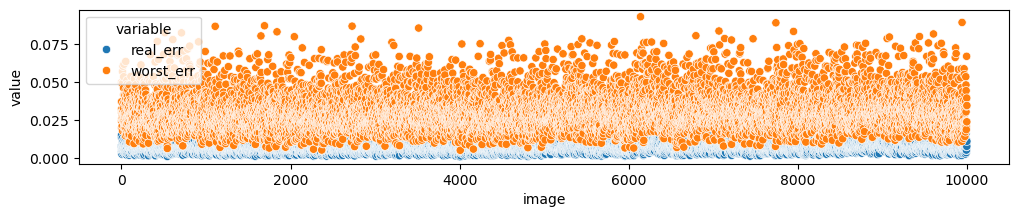

In [11]:
fig, ax = plt.subplots(figsize=(12,2))
sns.scatterplot(data=df_sel2, x="image", y="value", hue="variable", ax=ax)

In [12]:
df["image"].max()

9999

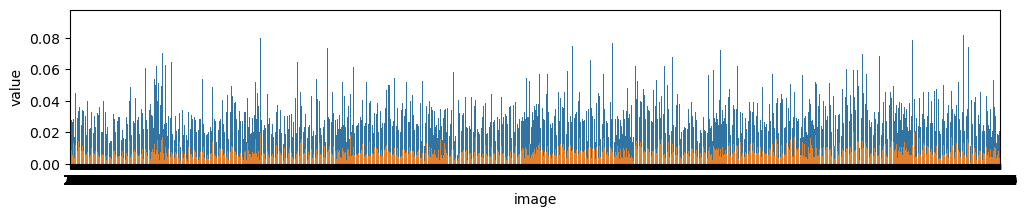

In [13]:
fig, ax = plt.subplots(figsize=(12,2))
sns.barplot(data=df_sel2[df_sel2["variable"]=="worst_err"], x="image", y="value", ax=ax)
sns.barplot(data=df_sel2[df_sel2["variable"]=="real_err"], x="image", y="value", ax=ax)
plt.savefig("obr.png")